<div align="center">
  <h1 align="center">Figure 3: Heterogeneity within datasets</h1>
  <p align="center"><i>Marie E Galteau, 2023</i></p>

  <table align="cener">
    <tr>
    <td><img align="right" src="https://open-neuroscience.com/post/nilearn/featured.png" alt="image" width="150" /></td>
    <td><img align="right" src="https://d33wubrfki0l68.cloudfront.net/e33fd6f372aa5d51e7b0de4bd763bd983251881e/4b0f4/blog/customising-matplotlib/matplot_title_logo.png" alt="image" width="200" /></td>
    </tr>
  </table>
</div>


---

In [11]:
# Import Libraries
import pandas as pd
import numpy as np
import nibabel as nib
from numpy import savetxt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from nilearn import plotting, image
from nilearn.plotting import plot_img
import matplotlib.gridspec as gridspec
from nilearn.maskers import NiftiMasker

In [13]:
# Init var

hrf_path = 'Two_gammas'
    # glover
    # spm
    # Two_gammas
    # Peak_span
    
analysis_folder = '/project/4180000.19/multirat_stim/scratch/rabies_test/'
z_scores_path = analysis_folder+f'first_level/{hrf_path}/z_score/'

metadata_path ='/home/traaffneu/margal/code/multirat_se/script/table/metadata_stand.tsv'
df = pd.read_csv(metadata_path, sep='\t')
df = df.loc[(df['exclude'] != 'yes')]

template_folder = '/groupshare/traaffneu/preclinimg/templates/'
template = nib.load('/groupshare/traaffneu/preclinimg/templates/SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1/SIGMA_Rat_Anatomical_Imaging/SIGMA_Rat_Anatomical_InVivo_Template/SIGMA_InVivo_Brain_Template_Masked.nii')
atlas_mask = nib.load(template_folder+'SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1/SIGMA_Rat_Anatomical_Imaging/SIGMA_Rat_Anatomical_InVivo_Template/SIGMA_InVivo_Brain_Mask.nii')
masker = NiftiMasker(mask_img=atlas_mask, standardize=True)

#anat_template_path = '/project/4180000.19/multirat_stim/rabies/preprocess/sub-0201002_ses-1/anat_datasink/anat_preproc/_scan_info_subject_id0201000.session1_split_name_sub-0201002_ses-1_crop_T2w/sub-0201002_ses-1_crop-orient_T2w_RAS_inho_cor.nii.gz'
#anat_template =nib.load(anat_template_path)
                                                                                                                                                                                                                                

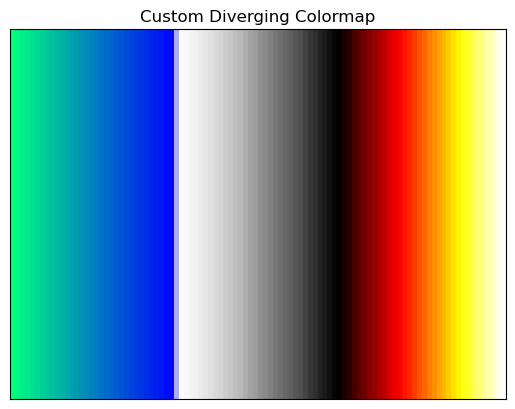

In [14]:
#If want to make custom color scale

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define colors for the lower and upper ranges
color_upper = plt.cm.hot(np.linspace(0., 1, 128))
color_middle = plt.cm.Greys(np.linspace(0., 1, 128))
color_lower = plt.cm.winter_r(np.linspace(0., 1, 128))

# Combine colors
colors = np.vstack((color_lower,color_middle, color_upper))

# Create a LinearSegmentedColormap from the combined colors
my_colors = mcolors.LinearSegmentedColormap.from_list('custom_diverging', colors)

# Plot the colormap
plt.imshow(np.linspace(-1, 1, 100).reshape(1, -1), cmap=my_colors, aspect='auto')
plt.xticks([])  # Hide x ticks
plt.yticks([])  # Hide y ticks
plt.title('Custom Diverging Colormap')
plt.show()


0
200100


/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/nilearn/signal.py:64: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn(


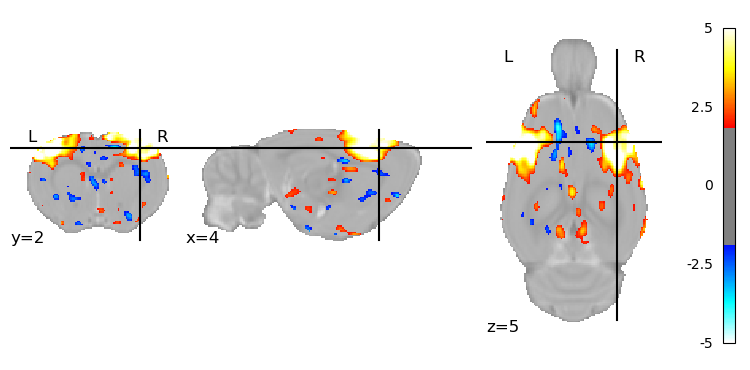

In [17]:
for ID in range(0, 1):

    subj_num=str(df.iloc[ID]['rat.sub']) #[:-2]
    print(ID)
    print(subj_num)

    z_scores = nib.load(z_scores_path+f'z_score_sub-0{subj_num}_ses-1.nii.gz')
    z_scores = masker.fit_transform(z_scores)                                 
        
    plot_stat = plotting.plot_stat_map(masker.inverse_transform(z_scores),
                                       bg_img=template,
                                       cut_coords=(4, 2, 5),  #forepaw=(4, 2, 5), hind = (3, 0, 5), visual(0, -7, 4)
                                       threshold=1.9,
                                       display_mode='ortho',
                                       cbar_tick_format='%.2g',
                                       symmetric_cbar=True,
                                       draw_cross=True,
                                       vmax=5,
                                       black_bg=False)
                                       #cmap=my_colors)     # For customed color scale
                                       
    #plt.savefig('/project/4180000.19/multirat_stim/scratch/plots/fig2_hetero/sub-0{}_z_scores_first-level.svg'.format(subj_num), format='svg', dpi=1200)
    #plt.savefig(f'/project/4180000.19/multirat_stim/scratch/plots/fig2_hetero/sub-0{subj_num}_z_scores_first-level.svg', format='svg', dpi=1200)
    plt.show()


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Step 1: Define color sequence from blue to white
blue_color = 'blues'
white_color = 'white'

# Step 2: Create color sequence
colors = [blue_color, white_color]

# Step 3: Create LinearSegmentedColormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_hot_blue', colors)

# Plot the colormap
plt.imshow(np.linspace(0, 1, 100).reshape(1, -1), cmap=custom_cmap, aspect='auto')
plt.xticks([])  # Hide x ticks
plt.yticks([])  # Hide y ticks
plt.title('Custom Hot Blue Colormap')
plt.show()


ValueError: Invalid RGBA argument: 'blues'

In [19]:
import matplotlib.pyplot as plt

# Get the winter colormap
winter_cmap = plt.cm.get_cmap('winter')

# Get the list of colors in the winter colormap
winter_colors = [winter_cmap(i) for i in range(winter_cmap.N)]

print(winter_colors)


[(0.0, 0.0, 1.0, 1.0), (0.0, 0.00392156862745098, 0.9980392156862745, 1.0), (0.0, 0.00784313725490196, 0.996078431372549, 1.0), (0.0, 0.011764705882352941, 0.9941176470588236, 1.0), (0.0, 0.01568627450980392, 0.9921568627450981, 1.0), (0.0, 0.0196078431372549, 0.9901960784313726, 1.0), (0.0, 0.023529411764705882, 0.9882352941176471, 1.0), (0.0, 0.027450980392156862, 0.9862745098039216, 1.0), (0.0, 0.03137254901960784, 0.9843137254901961, 1.0), (0.0, 0.03529411764705882, 0.9823529411764705, 1.0), (0.0, 0.0392156862745098, 0.9803921568627451, 1.0), (0.0, 0.043137254901960784, 0.9784313725490196, 1.0), (0.0, 0.047058823529411764, 0.9764705882352941, 1.0), (0.0, 0.050980392156862744, 0.9745098039215686, 1.0), (0.0, 0.054901960784313725, 0.9725490196078431, 1.0), (0.0, 0.058823529411764705, 0.9705882352941176, 1.0), (0.0, 0.06274509803921569, 0.9686274509803922, 1.0), (0.0, 0.06666666666666667, 0.9666666666666667, 1.0), (0.0, 0.07058823529411765, 0.9647058823529412, 1.0), (0.0, 0.0745098039

/tmp/ipykernel_3190/2580261209.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  winter_cmap = plt.cm.get_cmap('winter')


In [21]:
try:
    import matplotlib.pyplot as plt
except ImportError:
    raise RuntimeError("This script needs the matplotlib library")

import numpy as np
import nibabel as nib
from nilearn import plotting
from nilearn.plotting.cm import _cmap_d as nilearn_cmaps

# Load your data and define paths
# Assuming z_scores_path and template_path are defined

# Get the list of available colormaps
nmaps = len(nilearn_cmaps)
colormaps = list(nilearn_cmaps.keys())

# Loop through each brain map
for ID in range(96, 99):
    subj_num = str(df.iloc[ID]['rat.sub'])
    print(ID)
    print(subj_num)

    # Load the z-score image
    z_scores = nib.load(z_scores_path + 'z_score_sub-0{}_ses-1.nii.gz'.format(subj_num))

    # Initialize the figure
    plt.figure(figsize=(10, 4.2))
    plt.subplots_adjust(top=0.4, bottom=0.05, left=0.01, right=0.99)

    # Loop through each colormap
    for index, cmap in enumerate(colormaps):
        plt.subplot(1, nmaps + 1, index + 1)
        
        # Plot the brain map with the current colormap
        plot_stat = plotting.plot_stat_map(z_scores,
                                           bg_img=template,
                                           cut_coords=(4, 2, 5),
                                           threshold=1.9,
                                           display_mode='ortho',
                                           cbar_tick_format='%.2g',
                                           symmetric_cbar=True,
                                           draw_cross=True,
                                           vmax=5,
                                           black_bg=False,
                                           cmap=cmap)
        plt.title(cmap, fontsize=10, va="bottom", rotation=90)
        plt.axis("off")

    plt.show()


96
201101


/tmp/ipykernel_3190/973733235.py:33: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, nmaps + 1, index + 1)
